In [7]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [8]:
class NovelAnalyzer:
    def __init__(self):
     
        nltk.download('punkt_tab')
        nltk.download('stopwords')
        self.stop_words = set(stopwords.words('english'))
    
    def scrape_text(self, url):
      
        try:
            response = requests.get(url)
            response.raise_for_status()
            soup = BeautifulSoup(response.text, 'html.parser')
            text = soup.get_text()
            return text
        except Exception as e:
            print(f"Error scraping text: {e}")
            return None
    
    def process_text(self, text):
      
        text = text.lower()
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        tokens = word_tokenize(text)
        filtered_tokens = [
            word for word in tokens 
            if word not in self.stop_words 
            and len(word) > 2
            and word.isalpha()
        ]
        
        return filtered_tokens
    
    def get_word_frequencies(self, tokens, top_n=20):

        word_freq = Counter(tokens)
        return word_freq.most_common(top_n)
    
    def visualize_frequencies(self, word_frequencies):

        words, frequencies = zip(*word_frequencies)
        plt.figure(figsize=(12, 6))
        ax= sns.barplot(x=list(words), y=list(frequencies), color= 'orange')
        for i, freq in enumerate(frequencies):
            ax.text(i, freq + 0.02 * max(frequencies), str(freq), ha='center', va='bottom')
        plt.title('Most Frequent Words', pad=20)
        plt.xlabel('Words')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        
        return plt.gcf()
  

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Most frequent words:
said: 2834
one: 2048
prince: 1886
pierre: 1784
would: 1362
could: 1111
natsha: 1092
man: 1064
andrew: 1039
time: 921
princess: 915
face: 891
french: 872
went: 859
know: 841
eyes: 820
old: 803
room: 766
thought: 764
men: 760


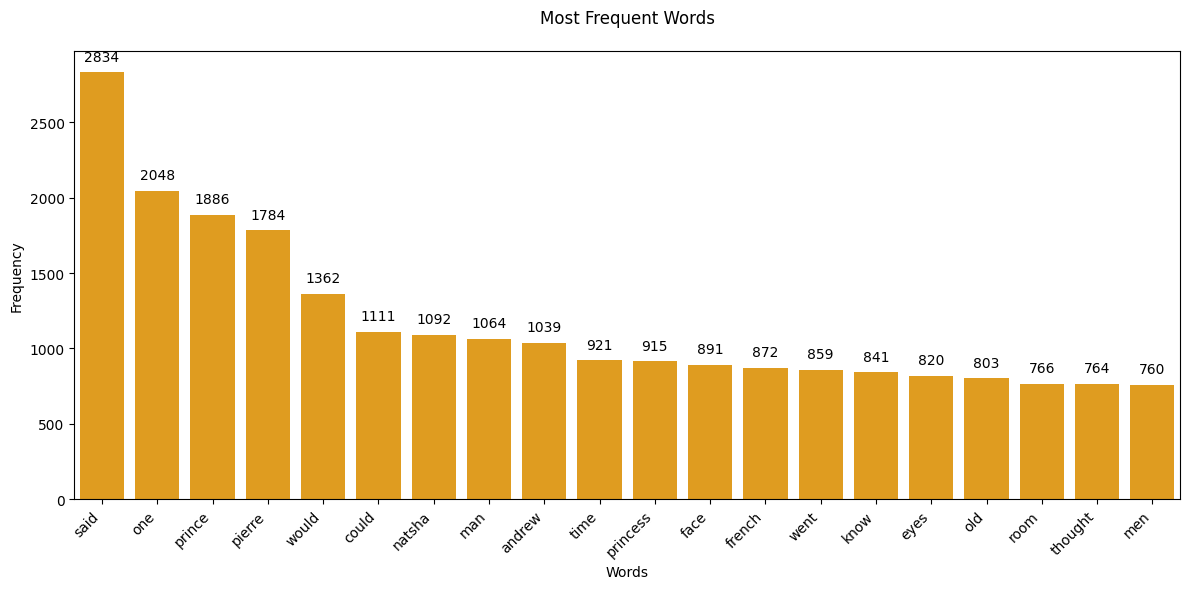

In [9]:
def main():

    analyzer = NovelAnalyzer()       
    url = "https://www.gutenberg.org/cache/epub/2600/pg2600-images.html"
    
 
    text = analyzer.scrape_text(url)
    if text:
        tokens = analyzer.process_text(text)
        word_freq = analyzer.get_word_frequencies(tokens)
        print("\nMost frequent words:")
        for word, freq in word_freq:
            print(f"{word}: {freq}")
        fig = analyzer.visualize_frequencies(word_freq)
        plt.show()
    
if __name__ == "__main__":
    main()